In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
barelydedicated_airbnb_duplicate_image_detection_path = kagglehub.dataset_download('barelydedicated/airbnb-duplicate-image-detection')

print('Data source import complete.')


100%|██████████| 104M/104M [00:00<00:00, 150MB/s] 

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.6 MB/s eta 0:00:00


### Importing necesary libraries

In [4]:
import imagehash
import pandas
import os
import cv2
from PIL import Image
import random

### Creating duplicates


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import os
from PIL import Image
import random

input_dir = "/content/drive/MyDrive/Smar_Image_Detection/Airbnb Data/Test Data/living-room"
output_dir = "/content/drive/MyDrive/duplicates"
os.makedirs(output_dir, exist_ok=True)

for i, filename in enumerate(os.listdir(input_dir), 1):
    if filename.endswith(".jpg"):
        img_path = os.path.join(input_dir, filename)
        no_of_copies = random.randint(0, 4)
        for counter in range(no_of_copies):
            image = Image.open(img_path)
            new_name = f"{counter}_{filename}"
            image.save(os.path.join(output_dir, new_name))

print("✅ Duplicate images saved to:", output_dir)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Smar_Image_Detection/Airbnb Data/Test Data/living-room'

### Removing duplicates
> * Using imagehash which converts the images into hash string and then futher compares.
> * Image hashes tell whether two images look nearly identical. This is different from cryptographic hashing algorithms (like MD5, SHA-1) where tiny changes in the image give completely different hashes. In image fingerprinting, we actually want our similar inputs to have similar output hashes as well.
>* The image hash algorithms (average, perceptual, difference, wavelet) analyse the image structure on luminance (without color information). The color hash algorithm analyses the color distribution and black & gray fractions (without position information).

**Imagehash github link :** https://github.com/JohannesBuchner/imagehash

In [ ]:
# Define the path to the directory containing the image files
path="/content/drive/MyDrive/duplicates"

# Define a function to check for duplicate images in the directory
def checkDuplication():
    # Create an empty dictionary to store image hashes and file paths
    images_hash={}
    # Iterate over all files in the directory
    for i in (os.listdir(path)):
        # Check if the file is a JPEG image
        if i.endswith(".jpg"):
            # Get the full file path of the image
            file_path=os.path.join(path,i)
            # Open the image using PIL library
            image=Image.open(file_path)
            # Calculate the average hash of the image and convert it to a string
            img_hash=str(imagehash.average_hash(image))
            # Check if the hash already exists in the dictionary
            if img_hash in images_hash:
                # If the hash exists, print a message indicating that the image is a duplicate and delete the file
                print(f"There is duplication present for {i}")
                os.remove(file_path)
            else:
                # If the hash doesn't exist, add it to the dictionary with the file path as the value
                images_hash[img_hash]=file_path
    # Return the dictionary containing the image hashes and file paths
    return images_hash

# Call the checkDuplication function and store the result in a variable
img_hash=checkDuplication()

# Print a message indicating that duplicates have been successfully removed
print("Duplicates present have been successfully removed!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]


Average Hash: 0it [00:00, ?it/s]

Perceptual Hash: 0it [00:00, ?it/s]

Difference Hash: 0it [00:00, ?it/s]

Wavelet Hash: 0it [00:00, ?it/s]

Color Hash: 0it [00:00, ?it/s]

CLIP Hash: 0it [00:00, ?it/s]


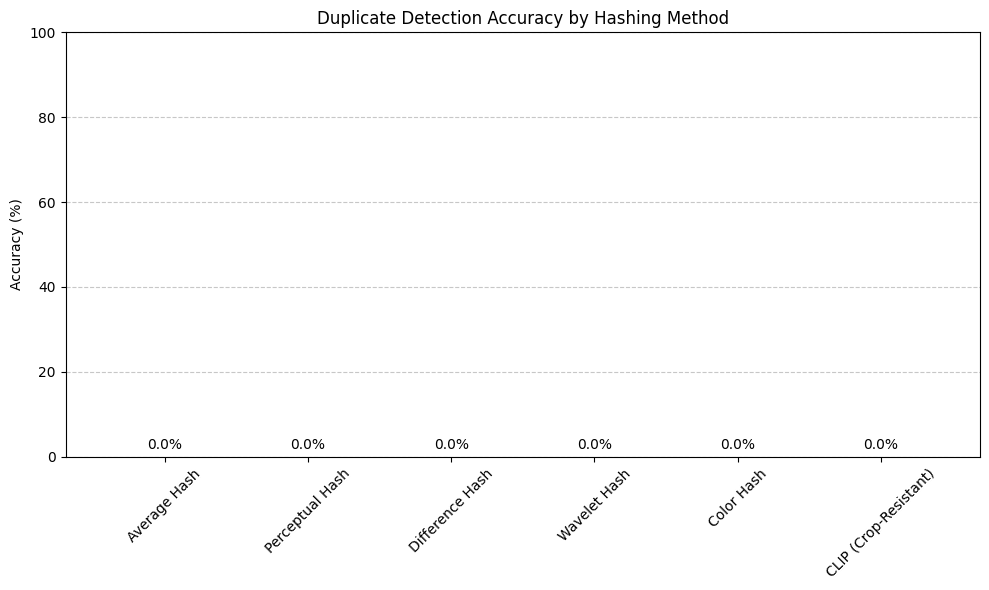

In [8]:
!pip install imagehash colorhash transformers tqdm --quiet

import os
import imagehash
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from tqdm import tqdm
from colorhash import ColorHash
from transformers import CLIPProcessor, CLIPModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Setup
input_dir = "/content/drive/MyDrive/duplicates"
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define hashing methods
hash_methods = {
    'Average Hash': imagehash.average_hash,
    'Perceptual Hash': imagehash.phash,
    'Difference Hash': imagehash.dhash,
    'Wavelet Hash': imagehash.whash,
    'Color Hash': lambda img: str(ColorHash(img)),
}

# Function to compute CLIP embedding
def get_clip_embedding(image):
    inputs = clip_processor(images=image, return_tensors="pt").to(device)
    outputs = clip_model.get_image_features(**inputs)
    return outputs[0].detach().cpu().numpy()

# Compute duplicates for traditional hashes
def compute_duplicates(method_name, hash_func):
    hash_dict = {}
    duplicates_found = 0
    total_images = 0

    for filename in tqdm(os.listdir(input_dir), desc=method_name):
        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        filepath = os.path.join(input_dir, filename)
        img = Image.open(filepath).convert("RGB")
        total_images += 1

        try:
            img_hash = hash_func(img)
            img_hash = str(img_hash)

            if img_hash in hash_dict:
                duplicates_found += 1
            else:
                hash_dict[img_hash] = filename
        except Exception as e:
            print(f"Error with {filename}: {e}")

    accuracy = (duplicates_found / total_images) * 100 if total_images else 0
    return duplicates_found, accuracy, total_images

# Compute duplicates with CLIP
def compute_clip_duplicates(threshold=0.97):
    embeddings = {}
    duplicates_found = 0
    total_images = 0

    for filename in tqdm(os.listdir(input_dir), desc="CLIP Hash"):
        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        filepath = os.path.join(input_dir, filename)
        img = Image.open(filepath).convert("RGB")
        total_images += 1
        emb = get_clip_embedding(img)

        found = False
        for saved_emb in embeddings.values():
            sim = cosine_similarity([emb], [saved_emb])[0][0]
            if sim > threshold:
                duplicates_found += 1
                found = True
                break
        if not found:
            embeddings[filename] = emb

    accuracy = (duplicates_found / total_images) * 100 if total_images else 0
    return duplicates_found, accuracy, total_images

# Evaluate all methods
results = {}
for name, func in hash_methods.items():
    duplicates, accuracy, total = compute_duplicates(name, func)
    results[name] = {"duplicates": duplicates, "accuracy": accuracy, "total": total}

# CLIP
clip_duplicates, clip_accuracy, clip_total = compute_clip_duplicates()
results["CLIP (Crop-Resistant)"] = {
    "duplicates": clip_duplicates,
    "accuracy": clip_accuracy,
    "total": clip_total,
}

# Plotting
plt.figure(figsize=(10, 6))
methods = list(results.keys())
accuracies = [results[m]["accuracy"] for m in methods]

bars = plt.bar(methods, accuracies, color='skyblue')
plt.title("Duplicate Detection Accuracy by Hashing Method")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Annotate bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"{acc:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


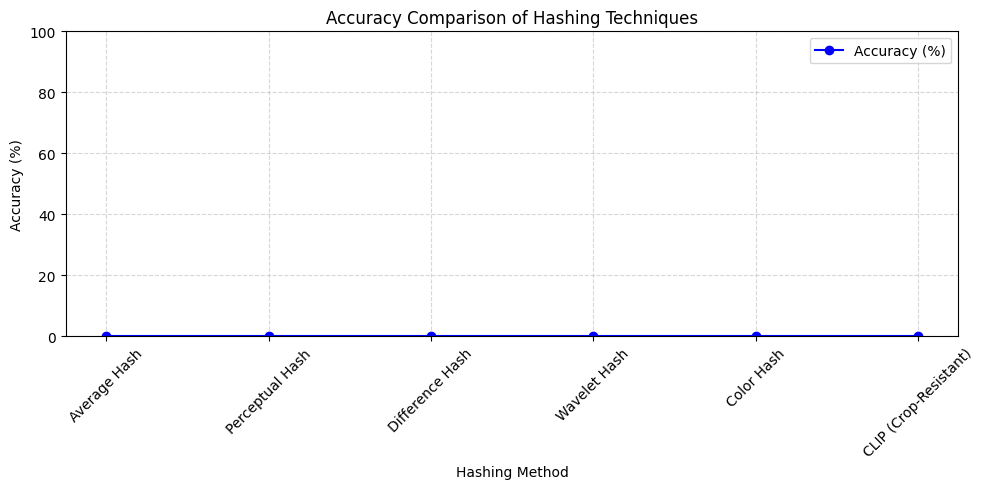

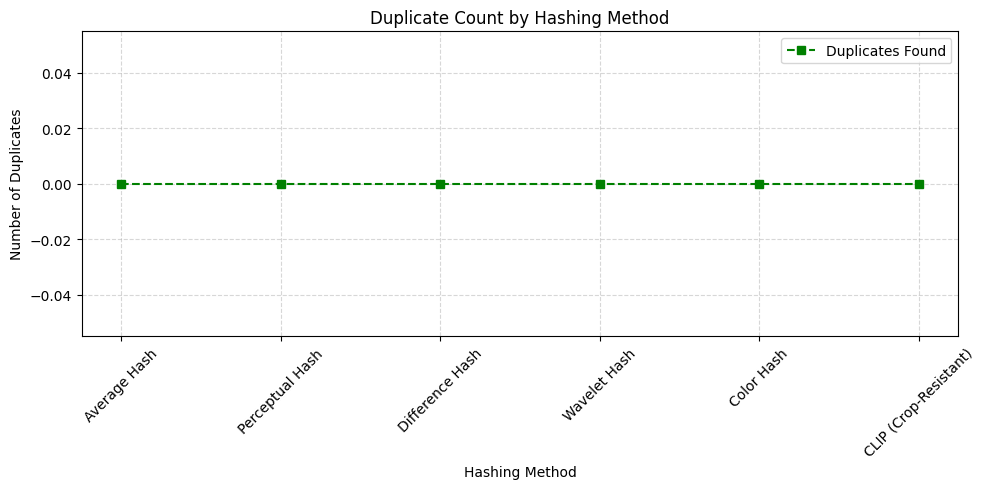


📊 Comparison Metrics:

               Method  Accuracy (%)  Duplicates Found  Total Images
         Average Hash             0                 0             0
      Perceptual Hash             0                 0             0
      Difference Hash             0                 0             0
         Wavelet Hash             0                 0             0
           Color Hash             0                 0             0
CLIP (Crop-Resistant)             0                 0             0


In [9]:
# ==============================
# 🔹 LINE PLOTS FOR COMPARISON
# ==============================

# Extract values
methods = list(results.keys())
accuracies = [results[m]["accuracy"] for m in methods]
duplicates = [results[m]["duplicates"] for m in methods]
totals = [results[m]["total"] for m in methods]

# LINE PLOT: Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.plot(methods, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy (%)')
plt.title("Accuracy Comparison of Hashing Techniques")
plt.xlabel("Hashing Method")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# LINE PLOT: Duplicates Found
plt.figure(figsize=(10, 5))
plt.plot(methods, duplicates, marker='s', linestyle='--', color='green', label='Duplicates Found')
plt.title("Duplicate Count by Hashing Method")
plt.xlabel("Hashing Method")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# 🔹 DISPLAY METRICS TABLE (OPTIONAL)
# ==============================

import pandas as pd

metrics_df = pd.DataFrame({
    "Method": methods,
    "Accuracy (%)": accuracies,
    "Duplicates Found": duplicates,
    "Total Images": totals,
})

print("\n📊 Comparison Metrics:\n")
print(metrics_df.to_string(index=False))
